In [74]:
from michigrad.engine import Value
from michigrad.nn import Layer
from michigrad.visualize import show_graph

In [75]:
# Datos para entrenar al modelo

# 4 arreglos con 2 Value cada uno 
Xs = [
    [Value(0.0), Value(0.0)],
    [Value(1.0), Value(0.0)],
    [Value(0.0), Value(1.0)],
    [Value(1.0), Value(1.0)],
]

Ys = [
    Value(0.0),
    Value(1.0),
    Value(1.0),
    Value(0.0),
]

In [76]:
# Entrenamiento del modelo

# Declaración de una capa con 2 neuronales lineales
model = Layer(2, 2, nonlin=False)

# Cada neurona ejecuta
# Output = (w1 * x1) + (w2 * x2) + b
def predict(x):
    out = model(x)
    # Se combinan los resultados de ambas neuronas en un solo valor
    aux = out[0] + out[1]
    return aux;

N = len(ys)
learning_rate = 0.01
L = Value(0)

for i in range(400):
    
    # Forward pass
    yhat = [predict(x) for x in xs]

    # Calculo Loss function
    L = sum( (y - ypred)**2 for y, ypred in zip(ys, yhat) ) * (Value(1) / Value(N))
    L.name = "L"
    
    # Gradiente en cero
    model.zero_grad()

    # Backpropagation
    L.backward()

    # Update
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    print(f'Iteracion={i}, L={L.data:.5f}')

Iteracion=0, L=0.89708
Iteracion=1, L=0.84031
Iteracion=2, L=0.79009
Iteracion=3, L=0.74561
Iteracion=4, L=0.70619
Iteracion=5, L=0.67120
Iteracion=6, L=0.64011
Iteracion=7, L=0.61245
Iteracion=8, L=0.58779
Iteracion=9, L=0.56578
Iteracion=10, L=0.54609
Iteracion=11, L=0.52846
Iteracion=12, L=0.51262
Iteracion=13, L=0.49838
Iteracion=14, L=0.48553
Iteracion=15, L=0.47392
Iteracion=16, L=0.46340
Iteracion=17, L=0.45384
Iteracion=18, L=0.44512
Iteracion=19, L=0.43716
Iteracion=20, L=0.42986
Iteracion=21, L=0.42315
Iteracion=22, L=0.41696
Iteracion=23, L=0.41124
Iteracion=24, L=0.40593
Iteracion=25, L=0.40099
Iteracion=26, L=0.39637
Iteracion=27, L=0.39205
Iteracion=28, L=0.38799
Iteracion=29, L=0.38417
Iteracion=30, L=0.38055
Iteracion=31, L=0.37713
Iteracion=32, L=0.37388
Iteracion=33, L=0.37079
Iteracion=34, L=0.36783
Iteracion=35, L=0.36501
Iteracion=36, L=0.36230
Iteracion=37, L=0.35970
Iteracion=38, L=0.35720
Iteracion=39, L=0.35479
Iteracion=40, L=0.35247
Iteracion=41, L=0.35022
It

Valor final Loss function : 0.25048
Predicciones finales: [0.4670249412283528, 0.5059583490776102, 0.4836921207927148, 0.5226255286419721]


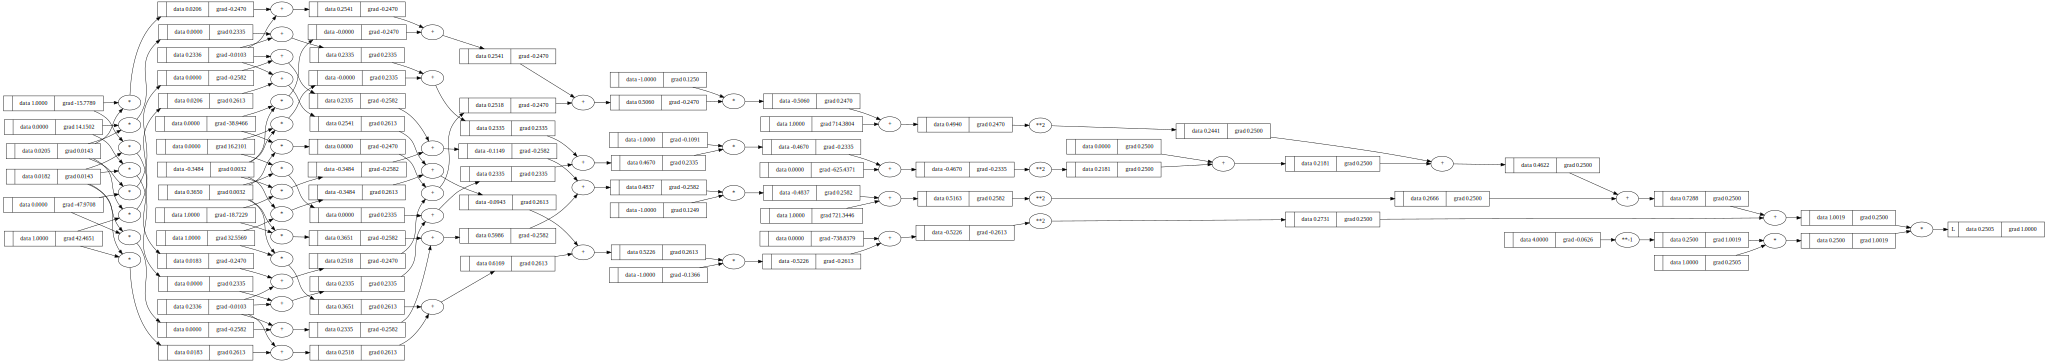

In [72]:
# Impresión de resultados

print(f"Valor final Loss function : {L.data:.5f}")
print("Predicciones finales:", [y.data for y in yhat])
show_graph(L)